In [1]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(idx),
            marker=markers[idx],
            label=cl
        )
    
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0], X_test[:, 1],
            alpha=1.0, linewidth=1,
            marker='o', s=55, label='test set'
        )
    return None

In [3]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_vals, eigen_vecs

(array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
        0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
        0.16831254, 0.21432212, 0.2399553 ]),
 array([[ 1.46698114e-01,  5.04170789e-01, -1.17235150e-01,
          2.06254611e-01, -1.87815947e-01, -1.48851318e-01,
         -1.79263662e-01, -5.54687162e-02, -4.03054922e-01,
         -4.17197583e-01,  2.75660860e-01,  4.03567189e-01,
          4.13320786e-04],
        [-2.42245536e-01,  2.42168894e-01,  1.49946576e-01,
          1.30489298e-01,  5.68639776e-01, -2.69052764e-01,
         -5.92636731e-01,  3.32731614e-02, -1.01833706e-01,
          2.17101488e-01, -8.13845005e-02, -1.52474999e-01,
         -8.78560762e-02],
        [-2.99344215e-02,  2.86984836e-01,  6.56394387e-01,
          1.51536318e-02, -2.99209426e-01, -9.33386061e-02,
          6.07334578e-02, -1.00618575e-01,  3.51841423e-01,
          1.28549846e-01, -1.29751275e-02,  1.68376064e-01,
         -4.52518598e-01],
        [-2.55190

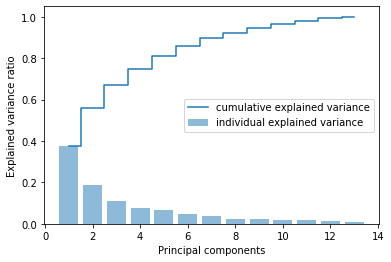

In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(
    range(1,14), var_exp, alpha=0.5, align='center',
    label='individual explained variance'
)
plt.step(
    range(1,14), cum_var_exp, where='mid',
    label='cumulative explained variance'
)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [6]:
eigen_pairs = [
    (np.abs(eigen_vals[i]), eigen_vecs[:,i])
    for i in range(len(eigen_vals))
]
eigen_pairs.sort(reverse=True)

In [8]:
w = np.hstack(
    (
    (eigen_pairs[0][1][:, np.newaxis]),
    (eigen_pairs[1][1][:, np.newaxis])
    )
)

w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [14]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [22]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 2.59891628,  0.00484089],
       [ 0.15819134, -2.26659577],
       [-2.6372337 ,  2.66488569],
       [-2.52848449,  0.51846618],
       [ 1.70922581, -0.91719459],
       [-2.83057003,  0.41936129],
       [-2.82251879,  1.99763147],
       [ 1.36618015,  0.04639099],
       [-2.46584868, -0.07932269],
       [-2.28554906, -0.40096658],
       [ 1.14246632, -2.39587633],
       [-2.28497881, -1.09274988],
       [-2.52924945,  0.6477328 ],
       [ 0.169245  , -1.1264982 ],
       [ 2.53088166,  1.05798498],
       [-0.71596964, -2.80365836],
       [ 2.46922033, -0.15871191],
       [-0.58044574, -0.69290749],
       [ 0.54583852,  0.41042188],
       [ 3.5604963 ,  1.42561284],
       [ 1.58679826, -1.51260121],
       [ 2.54872139, -0.05280515],
       [-3.59338727,  0.88321901],
       [-1.60406659,  2.40373662],
       [ 1.48668426, -1.40863724],
       [ 0.00830468, -2.04898307],
       [-0.15646658, -2.80278355],
       [-2.39863877,  2.47524175],
       [-3.13549157,

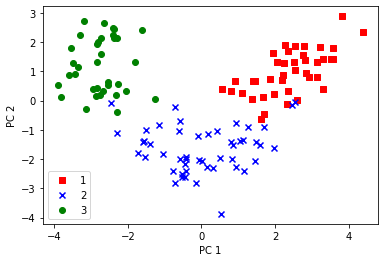

In [26]:
colors =  ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train==l, 0],
        X_train_pca[y_train==l, 1],
        c=c, label=l, marker=m
    )
    

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


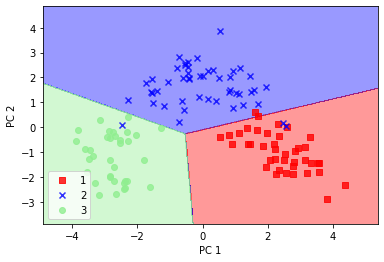

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


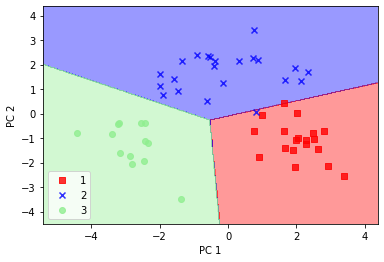

In [29]:
plot_decision_regions(X_test_pca,  y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [56]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3733, 0.1882, 0.109 , 0.0772, 0.0648, 0.0459, 0.0399, 0.0252,
       0.0226, 0.0183, 0.0164, 0.0128, 0.0064])

In [57]:
#Computing the scatter matrices

np.set_printoptions(precision=4)

mean_vecs = []

for label in range(1, 4):
    mean_vecs.append(
        np.mean(X_train_std[y_train==label], axis=0)
    )
    print('MV {}: {}'.format(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]
MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]
MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]


In [58]:
d = 13 # number of features
S_W = np.zeros( (d,d) )

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros( (d,d) )
    for row in X[y == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: {}x{}'.format(
    S_W.shape[0], S_W.shape[1]
))

Within-class scatter matrix: 13x13


In [59]:
print('Class label distribution: {}'.format(np.bincount(y_train)[1:]))

Class label distribution: [40 49 35]


In [60]:
d = 13
S_W = np.zeros( (d,d) )
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: {}x{}'.format(
    S_W.shape[0], S_W.shape[1]
))

Scaled within-class scatter matrix: 13x13


In [61]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d,d))

for i, mean_vec in enumerate(mean_vecs):
    n = X[y==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
S_B += n * (mean_vec - mean_overall).dot(
    (mean_vec - mean_overall).T
)

print('Between-class scatter matrix: {}x{}'.format(
    S_B.shape[0], S_B.shape[1]
))

Between-class scatter matrix: 13x13


In [62]:
eigen_vals, eigen_vecs = \
np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [
    (np.abs(eigen_vals[i]), eigen_vecs[:,i])
    for i in range(len(eigen_vals))
]

eigen_pairs = sorted(
    eigen_pairs, key=lambda k: k[0],
    reverse=True
)

print('Eigenvalues in decreasing order:\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

370.01109651149613
7.826529008668592e-14
3.4027677881242364e-14
2.8049009622439003e-14
1.113801766537638e-14
8.205712869753668e-15
8.205712869753668e-15
5.4931640554614185e-15
3.2465696302172147e-15
1.847303739627201e-15
1.847303739627201e-15
3.003593546531597e-17
0.0


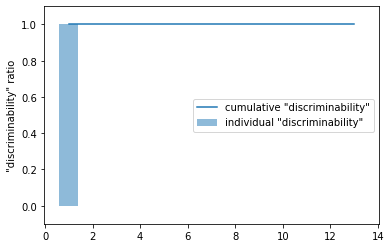

In [64]:
tot = sum(eigen_vals.real)

discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(
    range(1,14), discr, alpha=0.5, align='center',
    label='individual "discriminability"'
)
plt.step(
    range(1,14), cum_discr, where='mid',
    label='cumulative "discriminability"'
)
plt.ylabel('"discriminability" ratio')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [66]:
w = np.hstack(
    (
        eigen_pairs[0][1][:, np.newaxis].real,
        eigen_pairs[1][1][:, np.newaxis].real,
    )
)

print('Matrix W:\n', w)

Matrix W:
 [[-0.0102  0.043 ]
 [-0.0823  0.0951]
 [-0.0546  0.0931]
 [-0.122  -0.086 ]
 [ 0.0062 -0.0681]
 [-0.2257  0.664 ]
 [ 0.8044  0.2516]
 [ 0.0942 -0.2221]
 [-0.0508  0.1729]
 [-0.2398  0.1227]
 [ 0.1122 -0.2456]
 [ 0.3914 -0.5349]
 [ 0.2062 -0.153 ]]


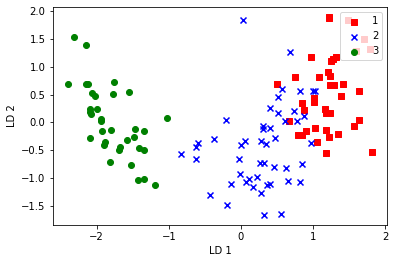

In [68]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_lda[y_train==l, 0],
        X_train_lda[y_train==l, 1],
        c=c, label=l, marker=m
    )

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

In [71]:
# LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


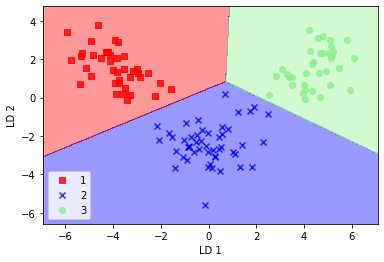

In [73]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)


plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


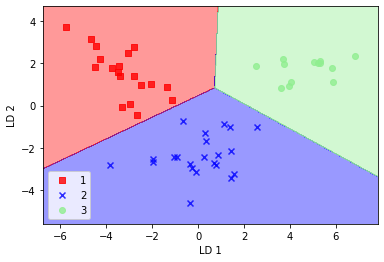

In [75]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)


plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()